<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Why-this-Paper?" data-toc-modified-id="Why-this-Paper?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Why this Paper?</a></span><ul class="toc-item"><li><span><a href="#Feeling-the-Future:-Lessons-in-Error" data-toc-modified-id="Feeling-the-Future:-Lessons-in-Error-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Feeling the Future: Lessons in Error</a></span></li><li><span><a href="#A-Flavour-of-the-Rigour" data-toc-modified-id="A-Flavour-of-the-Rigour-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>A Flavour of the Rigour</a></span><ul class="toc-item"><li><span><a href="#Did-anything-go-wrong?" data-toc-modified-id="Did-anything-go-wrong?-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Did anything go wrong?</a></span></li></ul></li><li><span><a href="#Bayesian-Logic-of-Evidence" data-toc-modified-id="Bayesian-Logic-of-Evidence-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Bayesian Logic of Evidence</a></span><ul class="toc-item"><li><span><a href="#Evidence-for-optional-Stopping" data-toc-modified-id="Evidence-for-optional-Stopping-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Evidence for optional Stopping</a></span></li><li><span><a href="#Evidence-for-Psi" data-toc-modified-id="Evidence-for-Psi-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Evidence for Psi</a></span></li></ul></li><li><span><a href="#Commentary" data-toc-modified-id="Commentary-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Commentary</a></span></li><li><span><a href="#Take-Away" data-toc-modified-id="Take-Away-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Take-Away</a></span></li></ul></li></ul></div>

In [2]:
import pymc3 as pm
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd
import arviz as az
from theano import tensor as tt
import graphviz

# Why this Paper?

Bem's paper published in 2011 raised a number of questions about the methodological standards of signigicance testing. This is important for the evaluation of A/B tests and reliability of our models. One species of criticism levelled at Bem was articulated by the Bayesian school of statistical inference. Additionally we're using the technique of Bayesian updating to solve the Share Allocation Problem in forecasting claims over financial channels. The below gives an example of the benefits of weighing the evidence in a Bayesian fashion.


## Feeling the Future: Lessons in Error

Daryl Bem did not literally explode peoples brains, but his proofs of the possibility shook psychology to the core. In a short and precise paper in 2011 Bem set out to show that there was good evidence for the existence of human pre-cognition. Paradoxical as it sounds he succeeded. His research coincided with the burgeoning realisation that there was a replication crisis in psychology, yet he presented his work as invitation to further replication. A tension between careful rigour and fantastical speculation characterised the work and provoked only anxiety in others that spurred an urgency for better explanations. 

## A Flavour of the Rigour
We won't delve into each of the experiments, but it's worth recalling something of the attention to detail and Bem's effort to avoid easy refutation. Fundamentally his methods mirror the best practice of the day. He chooses an experimental paradigm of accepted research and adapts or invert it to test for the presence of *psi*, the catch all term denoting foresight and pre-cognitive ability. The most evocative of these experiments asked 100 participants to pick amongst two curtains where a picture will appear behind one of the two. The choice of curtain and the content of the picture was assigned in a random fashion, although a proportion of the pictures were selected to match the particpant's sexual orientation. The theory was that some adaptive trait of the human organism would be primed to notice sexually stimulating possibilities in the near future. Success was measured against the benchmark of 50% accuracy.

The randomisation algorithm relied on a combination of methods using both software and a physical ramdomisation device to mitigate the risk that participants could either (i) intuit some pattern in the order of selection or (ii) manipulate the selection by psychokinesis. The randomising devices were then also run through the experiment to ensure that each guess achieved no greater accuracy than the benchmark 50%. Finally, each individual was measured on a scale of extraversion (a suspected correlate of *psi*) and tested. The results were tabulated and evaluated using standard parametric and non-parametric measures of statistical significance. The results showed a (technically) significant divergence from the null-hypothesis (53% accuracy) on the erotic stimuli, suggesting some evidence of pre-cognitive ability. The effect was pronounced in the extraverted participants who achieved 57% accurate predictions of where the image would be displayed. This was one of nine experiments he ran, of which eight returned suggestive evidence for *psi*

### Did anything go wrong?

What if anything was Bem's mistake? One diagnosis of the problem rests on the inherent weakness of hypothesis testing as a confirmatory device. The null-hypothesis mechanism aims to reject theories if the data is substantially incompatible with expectation. So phrased the burden of proof is massive. Even granting Bem his results, the nine experiments have to be weighed against the cumulative evidence of experience. With this constraint the evidence seems slight and is (at best) an invitation to replication. If we're less generous we can question fine-graining of the results. Notice how specific the nature of the effect in particular group of people for a particular variety of stimuli. We can fairly wonder if the results hold up to replication but also how the results were achieved. What part of the data was obtained in process of exploration versus experiement? This is commonly called the file-drawer problem - so named for the speculative number of unsuccessful analyses that were filed away instead of published. 

## Bayesian Logic of Evidence

Following the presentation of Lee & Wagenmakers in their *Bayesian Cognitive Modeling* we can instead consider problems with Bem's methods. The first suggestion is that the results may be due to a somewhat haphazard approach to ending an experiment. They posit that there is suspicious relationship between the sample size and observed effect size. The evaluation of the hypothesis is Bayesian - they seek to assess the probability of a correlation given the evidence i.e. Bem's results: 

$$ p(C | O) = \dfrac{p(C)p(O | C)}{\int_{i}^{N} p(O |C_{i})} $$

We'll consider two responses to Bem's paper. 

### Evidence for optional Stopping

We want to make a statistical inference about the most probable value for the correlations between effect size and sample size in Bem's process. On the hypothesis that there is some artifact of Bem's process either deliberate or unintentional that influences the data, we want to see what the data suggests is the most likely correlation. In an ideal experimental circumstance sample size should not have any relationship to observed effect, as long as the numbers are sufficiently large to observe any. 

<AxesSubplot:title={'center':'Negative Relationship'}, xlabel='Effect', ylabel='Sample'>

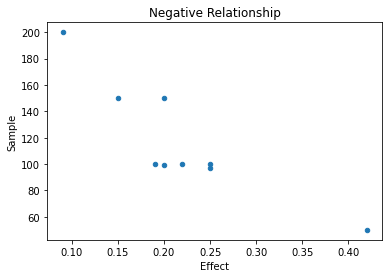

In [4]:
N = np.array([100, 150, 97, 99, 100, 150, 200, 100, 50])
E = np.array([0.25, 0.20, 0.25, 0.20, 0.22, 0.15, 0.09, 0.19, 0.42])

y = np.vstack([N, E]).T
n, n2 = np.shape(y)  # number of experiments
pd.DataFrame({'Sample': N, 'Effect': E}).plot.scatter(x='Effect', y='Sample', title="Negative Relationship")

In [8]:
#our data
pd.DataFrame(y, columns=['sample size', 'effect'])

,sample size,effect
0,100.0,0.25
1,150.0,0.20
2,97.0,0.25
3,99.0,0.20
4,100.0,0.22
5,150.0,0.15
6,200.0,0.09
7,100.0,0.19
8,50.0,0.42


The Bayesian paradigm of reasoning is especially nice for this kind of problem as it forces you to express your prior credence in the question at hand. In this case we want to say what our beliefs about the correlation between effect size and sample size would be were we to condition on Bem's observations. We'll look at another case where we asses our prior belief in *psi* itself and weigh it against the evidence. To incorporate our prior beliefs can model our observed values as draws from a bivariate normal distribution with gamma distributions over the variance terms and the correlation term enters the model as: 

$$ MvNormal([\mu1, \mu2],  \begin{bmatrix} \sigma_1^{2} & r\sigma_1\sigma_2 \\ r\sigma_1\sigma_2 & \sigma_2^{2} \end{bmatrix})$$

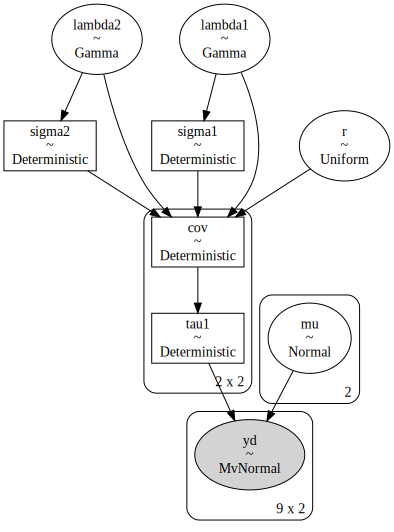

In [6]:
pm.model_to_graphviz(model1)

Taking this set up we infer the posterior probabilistic distribution of each of the parameters as follows:

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [lambda2, lambda1, mu, r]


Sampling 2 chains for 3_000 tune and 10_000 draw iterations (6_000 + 20_000 draws total) took 195 seconds.
There were 471 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6625274040717374, but should be close to 0.8. Try to increase the number of tuning steps.
There were 41 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


array([[<AxesSubplot:title={'center':'r'}>,
        <AxesSubplot:title={'center':'r'}>]], dtype=object)

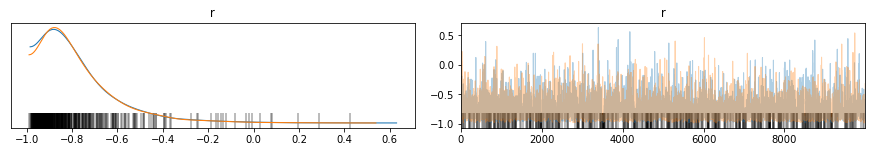

In [5]:
with pm.Model() as model1:
    # r∼Uniform(−1,1) prior for correlation
    r = pm.Uniform("r", lower=-1, upper=1)

    # μ1,μ2∼Gaussian(0,.001) prior mu for bivariate normal
    mu = pm.Normal("mu", mu=0, tau=0.001, shape=n2)

    # σ1,σ2∼InvSqrtGamma(.001,.001) prior sigma for bivariate normal
    lambda1 = pm.Gamma("lambda1", alpha=0.001, beta=0.001)
    lambda2 = pm.Gamma("lambda2", alpha=0.001, beta=0.001)
    sigma1 = pm.Deterministic("sigma1", 1 / np.sqrt(lambda1))
    sigma2 = pm.Deterministic("sigma2", 1 / np.sqrt(lambda2))

    cov = pm.Deterministic(
        "cov",
        tt.stacklists(
            [[lambda1 ** -1, r * sigma1 * sigma2], [r * sigma1 * sigma2, lambda2 ** -1]]
        ),
    )

    tau1 = pm.Deterministic("tau1", tt.nlinalg.matrix_inverse(cov))

    # Likelihood
    yd = pm.MvNormal("yd", mu=mu, tau=tau1, observed=y)

    trace1 = pm.sample(10000, tune=3000)

az.plot_trace(trace1, var_names=["r"])

This plot shows that the posterior distribution of the correlation coefficient. We can see here that the most likely value for the correlation coefficient show an anti-correlation of -0.772 between the effect size and sample size.

In [17]:
az.summary(trace1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu[0],88.386,20.485,48.780,122.265,0.404,0.286,2571.0,2571.0,2979.0,2604.0,1.0
mu[1],0.262,0.040,0.190,0.337,0.001,0.001,2558.0,2321.0,2952.0,2483.0,1.0
r,-0.772,0.173,-0.986,-0.464,0.003,0.002,3915.0,3610.0,2835.0,2794.0,1.0
lambda1,0.000,0.000,0.000,0.001,0.000,0.000,3843.0,3843.0,3217.0,3680.0,1.0
lambda2,113.888,59.476,18.131,221.251,0.946,0.669,3957.0,3957.0,3291.0,3281.0,1.0
sigma1,53.893,18.396,27.297,86.135,0.353,0.250,2720.0,2706.0,3217.0,3680.0,1.0
sigma2,0.105,0.031,0.057,0.163,0.001,0.000,2772.0,2629.0,3291.0,3281.0,1.0
"cov[0,0]",3242.869,2699.311,704.759,7363.186,51.890,36.696,2706.0,2706.0,3217.0,3680.0,1.0
"cov[0,1]",-4.815,3.828,-11.217,-0.231,0.084,0.059,2080.0,2080.0,2681.0,2730.0,1.0
"cov[1,0]",-4.815,3.828,-11.217,-0.231,0.084,0.059,2080.0,2080.0,2681.0,2730.0,1.0


### Evidence for Psi

It's one thing to question the methodological missteps of the paper, but it's quite another thing to try and evaluate the basic claim of Bem's paper. How does his evidence contribute to our belief in the occurence of *psi*. Even though he arrays a list of 9 experiments with suggestive evidence. It's possible that each represents a statistical fluke - a better test for the existence of $psi$ would involve measuring consistent performance over a number of trials. This is exactly what Wagenmaker's research attempted when trying to replicate Bem's results. He repeated Bem's original experiments and another analogous task measuring performance on both both tasks. 

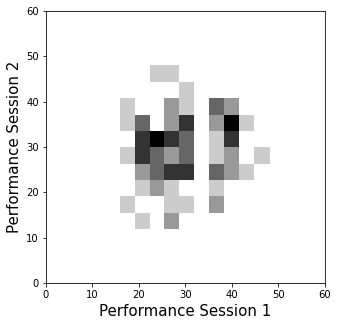

In [3]:
# Proportion correct on erotic pictures, block 1 and block 2:
prc1er=np.array([0.6000000, 0.5333333, 0.6000000, 0.6000000, 0.4666667, 
                 0.6666667, 0.6666667, 0.4000000, 0.6000000, 0.6000000,
                 0.4666667, 0.6666667, 0.4666667, 0.6000000, 0.3333333,
                 0.4000000, 0.4000000, 0.2666667, 0.3333333, 0.5333333,
                 0.6666667, 0.5333333, 0.6000000, 0.4000000, 0.4666667, 
                 0.7333333, 0.6666667, 0.6000000, 0.6666667, 0.5333333,
                 0.5333333, 0.6666667, 0.4666667, 0.3333333, 0.4000000,
                 0.5333333, 0.4000000, 0.4000000, 0.3333333, 0.4666667,
                 0.4000000, 0.4666667, 0.4666667, 0.5333333, 0.3333333,
                 0.7333333, 0.2666667, 0.6000000, 0.5333333, 0.4666667,
                 0.4000000, 0.5333333, 0.6666667, 0.4666667, 0.5333333,
                 0.5333333, 0.4666667, 0.4000000, 0.4666667, 0.6666667,
                 0.4666667, 0.3333333, 0.3333333, 0.3333333, 0.4000000,
                 0.4000000, 0.6000000, 0.4666667, 0.3333333, 0.3333333,
                 0.6666667, 0.5333333, 0.3333333, 0.6000000, 0.4666667,
                 0.4666667, 0.4000000, 0.3333333, 0.4666667, 0.5333333,
                 0.8000000, 0.4000000, 0.5333333, 0.5333333, 0.6666667,
                 0.6666667, 0.6666667, 0.6000000, 0.6000000, 0.5333333,
                 0.3333333, 0.4666667, 0.6666667, 0.5333333, 0.3333333,
                 0.3333333, 0.2666667, 0.2666667, 0.4666667, 0.6666667])

prc2er=np.array([0.3333333, 0.6000000, 0.5333333, 0.2666667, 0.6666667,
                 0.5333333, 0.6666667, 0.4666667, 0.4666667, 0.6666667,
                 0.4000000, 0.6666667, 0.2666667, 0.4000000, 0.4666667,
                 0.3333333, 0.5333333, 0.6000000, 0.3333333, 0.4000000,
                 0.4666667, 0.4666667, 0.6000000, 0.5333333, 0.5333333,
                 0.6000000, 0.5333333, 0.6666667, 0.6000000, 0.2666667,
                 0.4666667, 0.4000000, 0.6000000, 0.5333333, 0.4000000,
                 0.4666667, 0.5333333, 0.3333333, 0.4000000, 0.4666667,
                 0.8000000, 0.6000000, 0.2000000, 0.6000000, 0.4000000,
                 0.4000000, 0.2666667, 0.2666667, 0.6000000, 0.4000000,
                 0.4000000, 0.4000000, 0.4000000, 0.4000000, 0.6666667,
                 0.7333333, 0.5333333, 0.5333333, 0.3333333, 0.6000000,
                 0.5333333, 0.5333333, 0.4666667, 0.5333333, 0.4666667,
                 0.5333333, 0.4000000, 0.4000000, 0.4666667, 0.6000000,
                 0.6000000, 0.6000000, 0.4666667, 0.6000000, 0.6666667,
                 0.5333333, 0.4666667, 0.6000000, 0.2000000, 0.5333333,
                 0.4666667, 0.4000000, 0.5333333, 0.5333333, 0.5333333,
                 0.5333333, 0.6000000, 0.6666667, 0.4000000, 0.4000000,
                 0.5333333, 0.8000000, 0.6000000, 0.4000000, 0.2000000,
                 0.6000000, 0.6666667, 0.4666667, 0.4666667, 0.4666667])
Nt = 60
xobs = np.vstack([prc1er, prc2er]).T * Nt
n, n2 = np.shape(xobs)  # number of participants

plt.figure(figsize=[5, 5])
plt.hist2d(xobs[:, 0], xobs[:, 1], cmap="binary")
plt.xlabel("Performance Session 1", fontsize=15)
plt.ylabel("Performance Session 2", fontsize=15)
plt.axis([0, 60, 0, 60])
plt.show()

In [21]:
pd.DataFrame(xobs, columns=['Performance on 1', 'Performance on 2'])

,Performance on 1,Performance on 2
0,36.000000,19.999998
1,31.999998,36.000000
2,36.000000,31.999998
3,36.000000,16.000002
4,28.000002,40.000002
...,...,...
95,19.999998,36.000000
96,16.000002,40.000002
97,16.000002,28.000002
98,28.000002,28.000002


Since we want to evaluate the correlation of performance on both tests, where we would like to evaluate if the data suggests a positive correlation. Performance on the test is simply the count of correct answers for each participant on each experiment. As before we treat our observed guesses as draws from a bivariate normal distribution which is "filtered" through a probit transform. A probit transform like the logistic transform converts a continuous variable into a bi-furcated distribution which mirrors our choices. 

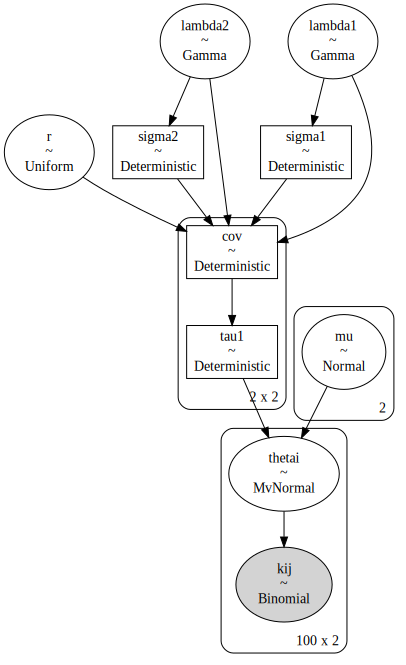

In [16]:
pm.model_to_graphviz(model2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [thetai, lambda2, lambda1, mu, r]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 26 seconds.
/Users/nathanielforde/anaconda/envs/examined_algorithms/lib/python3.6/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'r'}>,
        <AxesSubplot:title={'center':'r'}>]], dtype=object)

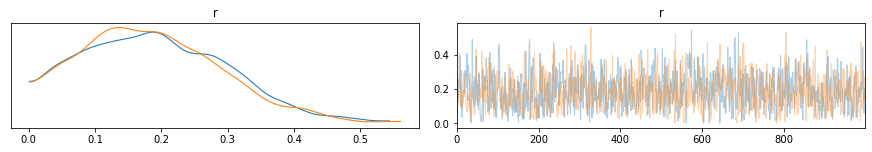

In [4]:
def phi(x):
    # probit transform
    return 0.5 + 0.5 * pm.math.erf(x / pm.math.sqrt(2))


with pm.Model() as model2:
    # r∼Uniform(−1,1)
    r = pm.Uniform("r", lower=0, upper=1)

    # μ1,μ2∼Gaussian(0,.001)
    mu = pm.Normal("mu", mu=0, tau=0.001, shape=n2)

    # σ1,σ2∼InvSqrtGamma(.001,.001)
    lambda1 = pm.Gamma("lambda1", alpha=0.001, beta=0.001, testval=100)
    lambda2 = pm.Gamma("lambda2", alpha=0.001, beta=0.001, testval=100)
    sigma1 = pm.Deterministic("sigma1", 1 / np.sqrt(lambda1))
    sigma2 = pm.Deterministic("sigma2", 1 / np.sqrt(lambda2))

    cov = pm.Deterministic(
        "cov",
        tt.stacklists(
            [[lambda1 ** -1, r * sigma1 * sigma2], [r * sigma1 * sigma2, lambda2 ** -1]]
        ),
    )

    tau1 = pm.Deterministic("tau1", tt.nlinalg.matrix_inverse(cov))

    thetai = pm.MvNormal("thetai", mu=mu, tau=tau1, shape=(n, n2))
    theta = phi(thetai)
    #likelihood
    kij = pm.Binomial("kij", p=theta, n=Nt, observed=xobs)

    trace2 = pm.sample()

az.plot_trace(trace2, var_names=["r"])

In [15]:
az.summary(trace2, var_names=["r"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
r,0.191,0.109,0.0,0.368,0.004,0.003,646.0,646.0,562.0,498.0,1.0


which that there is low expected correlation across the tests. It's this consistency measure that i find to be far more compelling than the array of 8 independent results catalogued in Bem's paper. Even assuming good faith on Bem's part It's too easy to generate anomalous results over one trial through some artifact of his process. The better measure of a theory relies on multiple testing and replication over related tasks. In Cartrawler we rely heavily on continual A/B testing to validate our models. Intuitively we're relying on legitimacy of Bayesian inference. 

## Commentary

## Take-Away

Bem's paper is an unsettling reminder that rigour comes in many forms and even witha good faith effort exactitude is not always enough to prevent error. In this case the Bayesian perspective provides a solid critique and proves itself a valuable lens with which to evaluate reliability of performance. More generally the explicit nature of Bayesian modelling and the careful manner in which you specify your prior expectations is appealing. It makes each model cleanly and quickly explainable. In all Bayesian models we simply update our priors with evidence and in return we get a multivariate posterior probability distribution.